Build a SVM model using human cell records, and classify cells to whether the samples are benign or malignant.

The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [1]:
from urllib.request import urlretrieve
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
out_file = "cell_samples.csv"

urlretrieve(url, out_file)

df = pd.read_csv(out_file)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


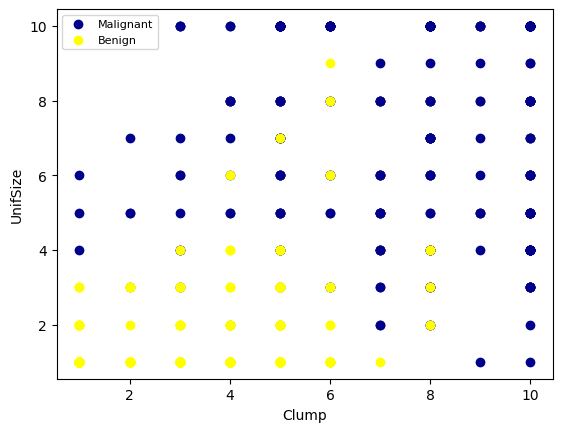

In [2]:
# Plot the distribution of the classes based on Clump thickness and Uniformity of cell size
import matplotlib.pyplot as plt

x = df['Clump'].values
y = df['UnifSize'].values
target_asCollor = df['Class'].values


plt.scatter(x[target_asCollor == 4], y[target_asCollor == 4], c='DarkBlue', label='Malignant')  # plot for malignant as blue color 
plt.scatter(x[target_asCollor == 2], y[target_asCollor == 2], c='Yellow', label='Benign')  # plot for benign as yellow color


plt.xlabel('Clump')
plt.ylabel('UnifSize')
plt.legend(loc='upper left', fontsize=8)

In [3]:
# make sure all variables are ints
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [4]:
# BareNuc has some values that are not int
# remove rows where 'BareNuc' column values cannot be converted to numbers

df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
# pd.to_numeric(df['BareNuc']: Tries to convert the 'BareNuc' column to numeric values
# errors='coerce': any values that can't be converted to numbers will become NaN
# .notnull(): True for not NaN, Flase for Nan
# df[...]: keeps only rows that are True (numerics)
df['BareNuc'] = df['BareNuc'].astype(int)  # to convert to int (I don't understand why?)

df.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score, jaccard_score

X = df.drop(['ID', 'Class'], axis=1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_svm = svm.SVC(kernel='rbf').fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(jaccard_score(y_test, y_pred, pos_label=2))

# check how to draw confusion matrix in the main file



0.9487028980826427
0.9166666666666666
